In [1]:
import nltk

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/tiago/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tiago/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [15]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/tiago/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [17]:
nltk.download('words')

[nltk_data] Downloading package words to /home/tiago/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [7]:
sentence ="""At eight o'clock on Trursday morning Arthur didn't feel very good"""
tokens = nltk.word_tokenize(sentence)
tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Trursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good']

In [13]:
tagged = nltk.pos_tag(tokens)
tagged[0:11]

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Trursday', 'NNP'),
 ('morning', 'NN'),
 ('Arthur', 'NNP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('feel', 'VB'),
 ('very', 'RB')]

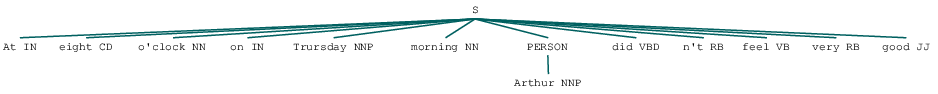

In [19]:
entities = nltk.chunk.ne_chunk(tagged)
entities

In [23]:
from nltk.corpus import brown

In [24]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [21]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


True

In [2]:
from urllib.request import Request, urlopen

In [3]:
link = Request('http://ultimosegundo.ig.com.br/politica/2017-04-25/reforma-da-previdencia.html',headers={'User-Agent': 'Mozilla/5.0'})

pagina = urlopen(link).read().decode('utf-8', 'ignore')

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(pagina, "lxml")
texto = soup.find(id="noticia").text

In [6]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [7]:
sentencas = sent_tokenize(texto,language='portuguese')
palavras = word_tokenize(texto.lower(),language='portuguese')

In [10]:
bagged = nltk.pos_tag(palavras)
bagged[0:30]

[('lúcio', 'NN'),
 ('bernardo', 'NN'),
 ('junior/câmara', 'NN'),
 ('dos', 'NN'),
 ('deputados', 'SYM'),
 ('-', ':'),
 ('19.4.17', 'CD'),
 ('deputados', 'JJ'),
 ('discutem', 'NN'),
 ('na', 'TO'),
 ('comissão', 'VB'),
 ('da', 'NN'),
 ('reforma', 'NN'),
 ('da', 'NN'),
 ('previdência', 'NN'),
 (';', ':'),
 ('com', 'CC'),
 ('gravata', 'NNS'),
 ('roxa', 'NN'),
 (',', ','),
 ('o', 'JJ'),
 ('presidente', 'NN'),
 ('do', 'VBP'),
 ('colegiado', 'NNS'),
 (',', ','),
 ('carlos', 'NN'),
 ('marun', 'VB'),
 ('a', 'DT'),
 ('comissão', 'JJ'),
 ('especial', 'JJ')]

In [12]:
nltk.help.upenn_tagset('VBP')

VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...


In [33]:
from nltk.corpus import stopwords
from string import punctuation

stopwords = set(stopwords.words('portuguese') + list(punctuation))
palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stopwords]

In [51]:
stopwords

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'hei',
 'houve',
 'houvemos',
 'h

In [35]:
from nltk.probability import FreqDist
frequencia = FreqDist(palavras_sem_stopwords)

In [36]:
from collections import defaultdict
sentencas_importantes = defaultdict(int)

In [37]:
for i, sentenca in enumerate(sentencas):
    for palavra in word_tokenize(sentenca.lower()):
        if palavra in frequencia:
            sentencas_importantes[i] += frequencia[palavra]

In [40]:
frequencia


FreqDist({'anos': 10, 'reforma': 8, 'comissão': 8, 'previdência': 7, 'semana': 6, 'plenário': 6, 'relatório': 6, 'especial': 5, 'deputados': 5, 'é': 5, ...})

In [38]:
from heapq import nlargest

idx_sentencas_importantes = nlargest(4, sentencas_importantes, sentencas_importantes.get)

In [39]:
for i in sorted(idx_sentencas_importantes):
    print(sentencas[i])


 


 Lúcio Bernardo Junior/Câmara dos Deputados - 19.4.17
Deputados discutem na Comissão da Reforma da Previdência; com gravata roxa, o presidente do colegiado, Carlos Marun


A comissão especial que analisa a proposta de reforma da Previdência na Câmara dos Deputados inicia na tarde desta terça-feira (25) a discussão do                   relatório apresentado na semana passada pelo relator
, deputado Arthur Maia (PPS-BA).
Depois de fechar acordo com parlamentares da oposição, que tentavam obstruir a sessão de leitura do parecer do relator, o presidente da comissão da                   reforma da Previdência
, deputado Carlos Marun (PMDB-MS), designou que todas as reuniões desta semana sejam para discutir o relatório e apresentar pedido de vista.
O relatório de Arthur Maia fixa a idade mínima de aposentadoria em 62 anos para as mulheres e em 65 anos para os homens após um período de transição de 20 anos.
Para se tornar lei, a proposta de reforma da Previdência precisa, após ser aprova

In [15]:
from nltk.corpus import machado


In [17]:
raw_text = machado.raw('romance/marm05.txt')
raw_text[10000:10200]

', primou no\nEstado, e foi um dos amigos particulares do vice-rei Conde da Cunha.\n\nComo este apelido de Cubas lhe\ncheirasse excessivamente a tanoaria, alegava meu pai, bisneto de Damião, que o\ndito ape'

In [18]:
text1 = machado.words('romance/marm05.txt')

In [19]:
len(text1)

77098

In [20]:
from nltk import ngrams, FreqDist

In [24]:
target_word = 'olhos'
fd = FreqDist(ng for ng in ngrams(text1,5) if target_word in ng)


In [38]:
import nltk.corpus
nltk.corpus.mac_morpho.words()

['Jersei', 'atinge', 'média', 'de', 'Cr$', '1,4', ...]

In [39]:
nltk.corpus.mac_morpho.sents() # doctest: +NORMALIZE_WHITESPACE

[['Jersei', 'atinge', 'média', 'de', 'Cr$', '1,4', 'milhão', 'em', 'a', 'venda', 'de', 'a', 'Pinhal', 'em', 'São', 'Paulo'], ['Programe', 'sua', 'viagem', 'a', 'a', 'Exposição', 'Nacional', 'do', 'Zebu', ',', 'que', 'começa', 'dia', '25'], ...]

In [40]:
nltk.corpus.mac_morpho.tagged_words()

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]

In [104]:
from nltk.corpus import floresta

In [106]:
floresta.sents()

[['Um', 'revivalismo', 'refrescante'], ['O', '7_e_Meio', 'é', 'um', 'ex-libris', 'de', 'a', 'noite', 'algarvia', '.'], ...]

In [125]:


def concatenate_sentences(sent):
    res =''
    for word in sent:
        res+= " " + word
    return res+'\n'

In [126]:
file = open('/home/tiago/floresta.txt','w') 
for sent in floresta.sents():
    file.write(concatenate_sentences(sent))
file.close() 

In [121]:
print(concatenate_sentences(floresta.sents()[1]))

 O 7_e_Meio é um ex-libris de a noite algarvia .


In [42]:
floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [43]:
def simplify_tag(t):
    if "+" in t:
        return t[t.index("+")+1:]
    else:
        return t

In [44]:
twords = floresta.tagged_words()

In [45]:
twords = [ (w.lower(), simplify_tag(t)) for (w,t) in twords]

In [49]:
words = floresta.words()

In [50]:
fd= nltk.FreqDist(words)

In [51]:
fd.max()

'de'

In [52]:
tags = [simplify_tag(tag) for (word,tag) in floresta.tagged_words()]

In [53]:
fd = nltk.FreqDist(tags)

In [60]:
chaves = fd.keys()

In [72]:
fd

FreqDist({'n': 40081, 'prp': 32442, 'art': 29360, 'v-fin': 15802, ',': 13444, 'prop': 11652, 'adj': 10725, 'adv': 9096, '.': 7725, 'conj-c': 5119, ...})

In [86]:
def concordance(word, context=30):
    for sent in floresta.sents():
        if word in sent:
            pos = sent.index(word)
            left= ' '.join(sent[:pos])
            right = ' '.join(sent[pos+1:])
            print('%*s %s %-*s' % (context, left[-context:],word, context, right[:context]))
            #print(right[:context])

In [87]:
concordance("dar")# doctest: +SKIP

anduru , foi o suficiente para dar a volta a o resultado .       
             1. O PÚBLICO veio dar a a imprensa diária portuguesa
  A fartura de pensamento pode dar maus resultados e nós não quer
                      Começa a dar resultados a política de a Uni
ial começar a incorporar- lo e dar forma a um ' site ' que tem se
r com Constantino para ele lhe dar também os papéis assinados .  
va a brincar , pois não lhe ia dar procuração nenhuma enquanto nã
érica como o antídoto capaz de dar sentido a o seu enorme poder .
          Os agentes decidiram dar vantagem a os raptores por est
ducação_Tecnológica , sem lhes dar qualquer tipo de formação .   
o CDS , a oposição decidiu não dar acordo para que a Lei_Orgânica
 em vésperas de o século XXI , dar novos argumentos os de a esper
isfação que vemos a Plataforma dar razão « a_posteriori » a Álvar
 intervenção e funcionamento , dar razão a Cunhal é também dar ra
« Parecia que tinha acabado de dar um aperto de mão a um velho am
          

In [88]:
from nltk.corpus import floresta

In [89]:
tsents = floresta.tagged_sents()
tsents = [[(w.lower(),simplify_tag(t)) for (w,t) in sent] for sent in tsents if sent]
train = tsents[100:]
test = tsents[:100]

In [93]:
tagger0 = nltk.DefaultTagger('n')
tagger1 = nltk.UnigramTagger(train, backoff=tagger0)
tagger2 = nltk.BigramTagger(train, backoff=tagger1)

In [95]:
from nltk.metrics import accuracy

In [100]:
sent_tokenizer=nltk.data.load('tokenizers/punkt/portuguese.pickle')
raw_text = machado.raw('romance/marm05.txt')
sentences = sent_tokenizer.tokenize(raw_text)

In [101]:
for sent in sentences[1000:1005]:
    print("<<", sent, ">>")

<< Era tarde; a infeliz expirou dentro de alguns
segundos. >>
<< Fiquei um pouco aborrecido, incomodado. >>
<<  Também por que diabo não era ela
azul? >>
<< disse comigo. >>
<< E esta reflexão,  uma das mais
profundas que se tem feito, desde a invenção das borboletas,  me consolou do
malefício, e me reconciliou comigo mesmo. >>


In [102]:
import os, nltk.test

In [132]:
testdir = '/home/tiago/nltk_test/'
le_path = os.path.join(testdir,'floresta.txt')




In [165]:
t = open(le_path, 'rb')

In [166]:
t2 = t.read()

In [167]:
text = t2.decode("utf8")
len(text)

1176477

In [168]:
lines = text.split('\n')

In [169]:
train = ' '.join(lines[10:])
test  = ' '.join(lines[:10])

In [170]:
print(test)

 Um revivalismo refrescante  O 7_e_Meio é um ex-libris de a noite algarvia .  É uma de as mais antigas discotecas de o Algarve , situada em Albufeira , que continua a manter os traços decorativos e as clientelas de sempre .  É um_pouco a versão de uma espécie de « outro lado de a noite , a meio caminho entre os devaneios de uma fauna periférica , seja de Lisboa , Londres , Dublin ou Faro e Portimão , e a postura circunspecta de os fiéis de a casa , que de ela esperam a música « geracionista de os 60 ou de os 70 .  Não deixa de ser , em os tempos que correm , um certo « very_typical algarvio , cabeça de cartaz para os que querem fugir a algumas movimentações nocturnas já a caminho de a ritualização de massas , de o género « vamos todos a o Calypso e encontramos- nos em a Locomia .  E assim , a os 2,5 milhões que o Ministério_do_Planeamento_e_Administração_do_Território já gasta em o pagamento de o pessoal afecto a estes organismos , vêm juntar- se os montantes de as obras propriamente d

In [171]:
stok = nltk.PunktSentenceTokenizer(train)
print(stok.tokenize(test))


[' Um revivalismo refrescante  O 7_e_Meio é um ex-libris de a noite algarvia .', 'É uma de as mais antigas discotecas de o Algarve , situada em Albufeira , que continua a manter os traços decorativos e as clientelas de sempre .', 'É um_pouco a versão de uma espécie de « outro lado de a noite , a meio caminho entre os devaneios de uma fauna periférica , seja de Lisboa , Londres , Dublin ou Faro e Portimão , e a postura circunspecta de os fiéis de a casa , que de ela esperam a música « geracionista de os 60 ou de os 70 .', 'Não deixa de ser , em os tempos que correm , um certo « very_typical algarvio , cabeça de cartaz para os que querem fugir a algumas movimentações nocturnas já a caminho de a ritualização de massas , de o género « vamos todos a o Calypso e encontramos- nos em a Locomia .', 'E assim , a os 2,5 milhões que o Ministério_do_Planeamento_e_Administração_do_Território já gasta em o pagamento de o pessoal afecto a estes organismos , vêm juntar- se os montantes de as obras prop

In [172]:
stok = nltk.data.load('tokenizers/punkt/portuguese.pickle')


In [173]:


stopwords = nltk.corpus.stopwords.words('portuguese')
fd = nltk.FreqDist(w.lower() for w in floresta.words() if w not in stopwords)
for word in list(fd.keys())[:20]:
    print(word,fd[word])

financial_times 1
4_plus 1
profeta 3
colegiada 1
orientou 1
bailados 1
festas 4
5ª 1
supreendentemente 1
egiptologia 1
taylor 1
flores 5
ana_arruda 1
integrada 3
56 2
icn 1
constrói 1
revival 1
contusões 1
tânico 1


In [175]:
fd['financial_times']

1

In [178]:
aaa = stok.span_tokenize(floresta.words())

In [182]:
help(stok)

Help on PunktSentenceTokenizer in module nltk.tokenize.punkt object:

class PunktSentenceTokenizer(PunktBaseClass, nltk.tokenize.api.TokenizerI)
 |  A sentence tokenizer which uses an unsupervised algorithm to build
 |  a model for abbreviation words, collocations, and words that start
 |  sentences; and then uses that model to find sentence boundaries.
 |  This approach has been shown to work well for many European
 |  languages.
 |  
 |  Method resolution order:
 |      PunktSentenceTokenizer
 |      PunktBaseClass
 |      nltk.tokenize.api.TokenizerI
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, train_text=None, verbose=False, lang_vars=None, token_cls=<class 'nltk.tokenize.punkt.PunktToken'>)
 |      train_text can either be the sole training text for this sentence
 |      boundary detector, or can be a PunktParameters object.
 |  
 |  debug_decisions(self, text)
 |      Classifies candidate periods as sentence breaks, yielding a dict for
 |      ea

In [52]:
import nltk.corpus, nltk.tag, itertools
brown_review_sents = nltk.corpus.brown.tagged_sents(categories=['reviews'])
brown_lore_sents = nltk.corpus.brown.tagged_sents(categories=['lore'])
brown_romance_sents = nltk.corpus.brown.tagged_sents(categories=['romance'])
 
brown_train = list(itertools.chain(brown_review_sents[:1000], brown_lore_sents[:1000], brown_romance_sents[:1000]))
brown_test = list(itertools.chain(brown_review_sents[1000:2000], brown_lore_sents[1000:2000], brown_romance_sents[1000:2000]))
 
conll_sents = nltk.corpus.conll2000.tagged_sents()
conll_train = list(conll_sents[:4000])
conll_test = list(conll_sents[4000:8000])
 
treebank_sents = nltk.corpus.treebank.tagged_sents()
treebank_train = list(treebank_sents[:1500])
treebank_test = list(treebank_sents[1500:3000])

In [53]:
def backoff_tagger(tagged_sents, tagger_classes, backoff=None):
    if not backoff:
        backoff = tagger_classes[0](tagged_sents)
        del tagger_classes[0]
 
    for cls in tagger_classes:
        tagger = cls(tagged_sents, backoff=backoff)
        backoff = tagger
 
    return backoff
 
ubt_tagger = backoff_tagger(train_sents, [nltk.tag.UnigramTagger, nltk.tag.BigramTagger, nltk.tag.TrigramTagger])
utb_tagger = backoff_tagger(train_sents, [nltk.tag.UnigramTagger, nltk.tag.TrigramTagger, nltk.tag.BigramTagger])
but_tagger = backoff_tagger(train_sents, [nltk.tag.BigramTagger, nltk.tag.UnigramTagger, nltk.tag.TrigramTagger])
btu_tagger = backoff_tagger(train_sents, [nltk.tag.BigramTagger, nltk.tag.TrigramTagger, nltk.tag.UnigramTagger])
tub_tagger = backoff_tagger(train_sents, [nltk.tag.TrigramTagger, nltk.tag.UnigramTagger, nltk.tag.BigramTagger])
tbu_tagger = backoff_tagger(train_sents, [nltk.tag.TrigramTagger, nltk.tag.BigramTagger, nltk.tag.UnigramTagger])

NameError: name 'train_sents' is not defined